<a href="https://colab.research.google.com/github/apfoertn/Kaggle_Challenge/blob/master/Kaggle_Houses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project description**

# 1. Import all necessary packages

In [1]:
#check if notebook runs in colab
import sys
IN_COLAB = 'google.colab' in sys.modules
print('running in Colab:',IN_COLAB)
path='..'
if IN_COLAB:
  #in colab, we need to clone the data from the repo
  !git clone https://github.com/apfoertn/Kaggle_Challenge.git
  path='Kaggle_Challenge'

running in Colab: True
fatal: destination path 'Kaggle_Challenge' already exists and is not an empty directory.


In [2]:
#import all necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import skew 
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 2. Import data

In [3]:
#import data from GitHub
train = pd.read_csv(path+'/data/train.csv')
test = pd.read_csv(path+'/data/test.csv')

# 3. Getting in touch with the data

Having a first look on the data and get a first impression of the datasets.**Text fett markieren**

In [4]:
print('Number of observations in train data:',train.shape[0])
print('Number of colums in train data:', train.shape[1])

Number of observations in train data: 1460
Number of colums in train data: 81


In [5]:
#show the first 10 lines of train data
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,...,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,...,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,...,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,...,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,

In [6]:
print('Number of observations in test data:',test.shape[0])
print('Number of colums in test data:', test.shape[1])

Number of observations in test data: 1459
Number of colums in test data: 80


In [7]:
#show the first 10 lines of test data
test.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,763.0,763.0,GasA,Gd,Y,SBrkr,763,892,0,1655,0.0,0.0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1993.0,Fin,2.0,440.0,TA,TA,Y,157,84,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,6,7,1992,2007,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Gd,PConc,Gd,TA,No,ALQ,935.0,Unf,0.0,233.0,1168.0,GasA,Ex,Y,SBrkr,1187,0,0,1187,1.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Attchd,1992.0,Fin,2.0,420.0,TA,TA,Y,483,21,0,0,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1998,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,789.0,789.0,GasA,Gd,Y,SBrkr,789,676,0,1465,0.0,0.0,2,1,3,1,TA,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,393.0,TA,TA,Y,0,75,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,7,5,1990,1990,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,Gd,GLQ,637.0,Unf,0.0,663.0,1300.0,GasA,Gd,Y,SBrkr,1341,0,0,1341,1.0,0.0,1,1,2,1,Gd,5,Typ,1,Po,Attchd,1990.0,Unf,2.0,506.0,TA,TA,Y,192,0,0,0,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1970,1970,Gable,CompShg,

If we compare both datasets, we see that the test data has one feature/column less than the train data. 

But if we think about our target variable 'SalePrice', which we wanna predict, it makes sense that it is missing in the test dataset.

Now let's see with which datatypes we are dealing with:

In [8]:
#check the occuring datatypes and their amount
train.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

The result shows that we are dealing with numerical (int64 & float64) and categorical (object) data. Later on, we gonna check if they all are declared correct. For example, features containing a year/month are often declared as a numeric feature, but they should be handled as categorical. 

# 4. Have a look at the target variable 'SalePrice'

SalePrice is the target variable which we wanna predict. Therefore, we gonna have a closer look at it.

In [9]:
#get an overview over the feature SalePrice
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

The description of the SalePrice provides some interesting first insights:

*   The average price of a house is 180.921 dollars.
*   The cheapest house costs 349.000 dollars.
*   The most expensive house costs 755.000 dollars.

To get an impression of the distribution of the SalePrice let's plot it into a histogramm.





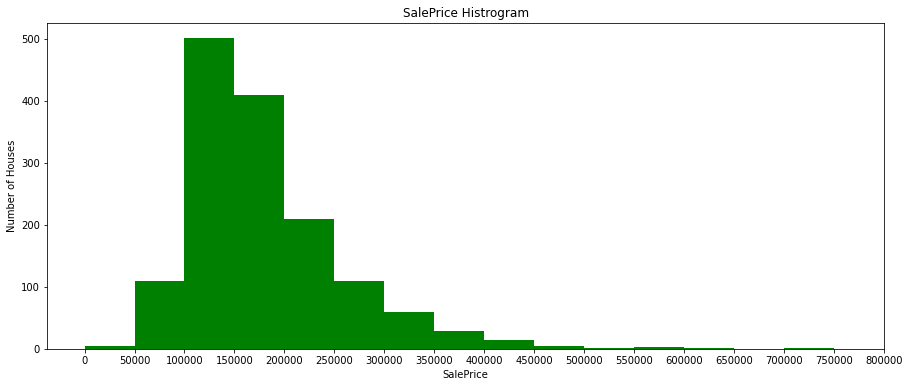

In [10]:
#group the sale price into categories to visualise distribution

#sort the values from the top to the least value
df = train.SalePrice.sort_values(ascending = False)
df

#create bins
binsVal = np.arange(0, 800000, 50000)
binsVal

#set figure size and create histogram
plt.figure(figsize=[15,6])
plt.hist(df, bins = binsVal, color='green')


#set the title, xticks and labels
plt.xlabel('SalePrice')
plt.xticks([0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000, 550000, 600000, 650000, 700000, 750000, 800000])
plt.ylabel('Number of Houses')
plt.title('SalePrice Histrogram')

#show plot
plt.show()

The first histogram created with matplotlib shows a first distribution of the SalePrice. 

You can see that almost 2/3(~900 of 1460) of the houses cost between 100.000 and 200.000 dollars and only a few houses cost more than 400.000 dollars.

Furthermore, it would be nice to have a best fit line, to be able to make a better statement about the distribution.

The best fit line could be created (in my opinion) in a very circumstantial way with matplotlib (tried it, but failed). But there is a better alternative: [seaborn.distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot)

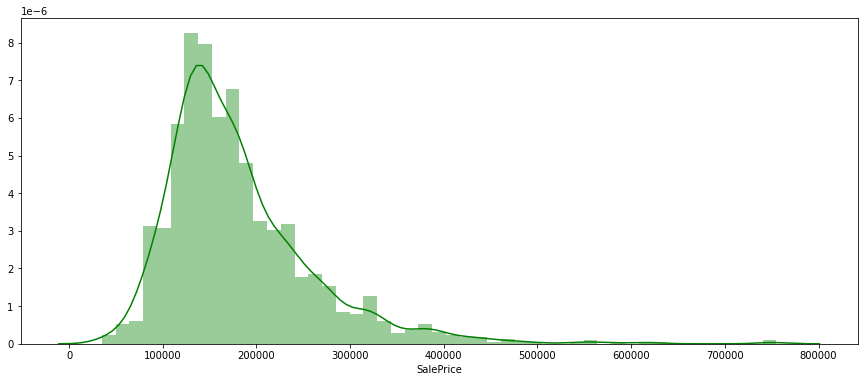

In [11]:
#set the size of the figure
plt.figure(figsize=[15,6])

#create plot
sns.distplot(train.SalePrice, color='green')

#show plot
plt.show()

As you can see the best fit line is already included in this kind of plot. 

The best fit line shows us that the SalePrice is not normally distributed, it is right-skewed! Right-skewed means that the tail is on the right side of the distribution and indicates a positive skewed data.([More info about skewness](https://medium.com/@TheDataGyan/day-8-data-transformation-skewness-normalization-and-much-more-4c144d370e55))

But let's check the skewness value:

In [12]:
train.SalePrice.skew()

1.8828757597682129

The skewness value of 1.8 confirms the assumption about the skewness. 

If the skewness value lies above 1 or is lower than -1 the distribution is highsly skewed. ([More info about skewness](https://medium.com/@TheDataGyan/day-8-data-transformation-skewness-normalization-and-much-more-4c144d370e55))


Therefore, we need to transform the distribution of SalePrice.

But why? Because we need a normal distribution to get good predicitions with the ML models.

To fix positively skewed data there are different common options. For example cube root transformation, square root transformation or logarithm transformation. 

WE...

In [13]:
train.SalePrice = np.log1p(train.SalePrice)

In [14]:
train.SalePrice.skew()

0.12134661989685333

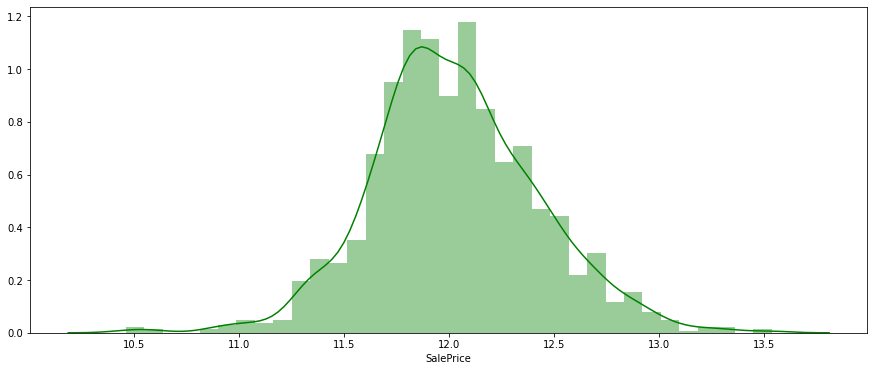

In [15]:
df2 = train.SalePrice.sort_values(ascending = False)

plt.figure(figsize=[15,6])
sns.distplot(df2, color='green')
plt.show()

# 5. Check other features and their correlation to the target variable 'SalePrice' 

Before that, we gonna have a look at the other features and their correlation with the SalePrice. 

We have already evaluated that we are dealing with numerical and categorical data. Let's see which features are of which datatype: 

In [16]:
#get all numerical columns (except ID and SalePrice)
numerical = train.drop('Id', axis=1).drop('SalePrice', axis=1).dtypes[train.dtypes != 'object'].index

#get all categorical columns (except ID)
categorical = train.drop('Id', axis=1).dtypes[train.dtypes == 'object'].index

#show both
print('List of numerical columns: \n',numerical, '\n\n')
print('List of categorical columns: \n',categorical)

List of numerical columns: 
 Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object') 


List of categorical columns: 
 Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFi

The features ID and SalePrice are not listed here. ID is only a random number for identification and doesn't have any impact on the SalePrice. SalePrice isn't included because it is the target variable. 

As you can see, features containing a year/month ('YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold') are declared numerical. We gonna fix this later on.

Now let's check the correlation of all features with the target variable SalePrice.

In [17]:
#get correlation of all features with SalePrice and list them in descending order
corr = train.corr()
corr['SalePrice'].sort_values(ascending=False)[1:]

OverallQual      0.817185
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
GarageYrBlt      0.541073
TotRmsAbvGrd     0.534422
Fireplaces       0.489450
MasVnrArea       0.430809
BsmtFinSF1       0.372023
LotFrontage      0.355879
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209043
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057330
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
Id              -0.017942
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePrice, dtype: float64

Let's visualise the top 10 most correlated features:

1. SalePrice and OverallQual

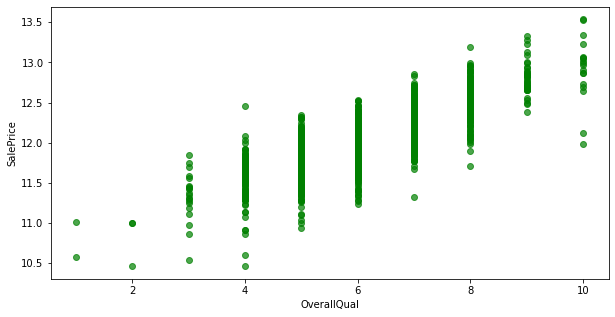

In [18]:
#visualise correlation between SalePrice and OverallQual in a scatter plot
plt.figure(figsize=[10,5])
plt.scatter(train['OverallQual'], train['SalePrice'], c='green', alpha = 0.7)
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.show()

In the lower right corner it seems like there are two outliers. But they don't seem to bad so we keep them.

2. SalePrice and GrLivArea

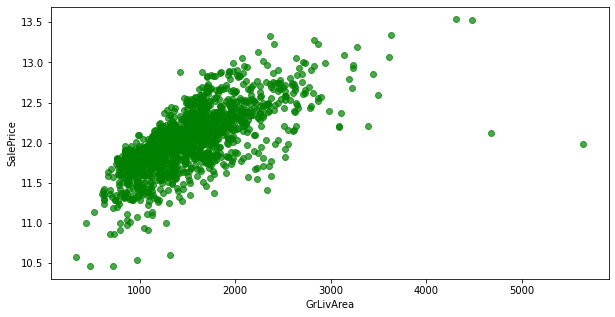

In [19]:
#visualise correlation between SalePrice and GrLivArea in a scatter plot
plt.figure(figsize=[10,5])
plt.scatter(train['GrLivArea'], train['SalePrice'], c='green', alpha = 0.7)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

There are two outliers in the lower right corner of the graph which don't make sense. Those two outliers seem like people pay less the bigger the living area. Consequently, we gonna drop those two.

# 6. Search and handle NaN-values

Search for NaN-values

In [20]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values  #ÜBERPRÜFEN
#put train and test data together to handle both at once
concat_data = pd.concat((train, test)).reset_index(drop=True)
#drop target variable SalePrice
concat_data.drop(['SalePrice'], axis = 1, inplace = True)

In [21]:
#search NaN-values per column in combined data
missing_val_count_by_column = (concat_data.isnull().sum())

#show all columns which have NaN-values and the number of NaN-values in descending order 
nanvalues = missing_val_count_by_column[missing_val_count_by_column > 0].sort_values(ascending=False)
print('Number of NaN-values per column:\n',nanvalues)

Number of NaN-values per column:
 PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
FireplaceQu     1420
LotFrontage      486
GarageFinish     159
GarageYrBlt      159
GarageQual       159
GarageCond       159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Utilities          2
Functional         2
Exterior2nd        1
Exterior1st        1
SaleType           1
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
Electrical         1
KitchenQual        1
GarageCars         1
GarageArea         1
TotalBsmtSF        1
dtype: int64


In [22]:
nanvalues.count()

34

We got 34 different columns with NaN-values. We have to handle all of them before we gonna go on.

One way to handle the colums with a very high amount of missing data would be to drop them. But first let's have a look at the data description (data_description.txt) to see if it would make sense to drop them:

[More on handling NaN-values](https://www.kaggle.com/dansbecker/handling-missing-values)

If you go through all features you realise it doesn't make sense to delete those features. So we gonna go another way to handle the missing values: Imputation!



First we replace all ... for example in the feature 'PoolQC' a missing value stands for 'No Pool'.

In [23]:
#replacing NaN-values in colums where it means 'None' with 'None'
missing_none_col = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'GarageType', 'BsmtExposure',
                   'BsmtCond', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1', 'MasVnrType'] 
for i in missing_none_col:
    concat_data[i] = concat_data[i].fillna('None')

Afterwards we replace all ...

For example a NaN-value in the column 'MasnVnrArea' stands for an area of 0 square feet.

In [24]:
#replacing NaN-values with a 0
missing_zero_col = ['GarageYrBlt', 'MasVnrArea', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'GarageCars', 'GarageArea', 'TotalBsmtSF']

for i in missing_zero_col:
    concat_data[i] = concat_data[i].fillna(0)

replace NaN-values with the value that appears most [(mode)](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mode.html)

In [25]:
concat_data.Electrical.value_counts()

SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [26]:
#replace NaN-values with the value that appears most (mode) 
concat_data.Electrical = concat_data.Electrical.fillna(concat_data.Electrical.mode()[0])
concat_data.KitchenQual = concat_data.KitchenQual.fillna(concat_data.KitchenQual.mode()[0])
concat_data.Exterior1st = concat_data.Exterior1st.fillna(concat_data.KitchenQual.mode()[0])
concat_data.Exterior2nd = concat_data.Exterior2nd.fillna(concat_data.KitchenQual.mode()[0])
concat_data.SaleType = concat_data.SaleType.fillna(concat_data.KitchenQual.mode()[0])
concat_data.MSZoning = concat_data.groupby('MSSubClass').MSZoning.transform(lambda x: x.fillna(x.mode()[0]))

If we check the example feature 'Electrical' we can see that the one NaN-value got replaced by 'SBrkr'.

In [27]:
concat_data.Electrical.value_counts()

SBrkr    2672
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [47]:
#sd
#concat_data.Utilities = concat_data.Utilities.fillna(concat_data.Utilities.mode()[0])

concat_data.Utilities.value_counts()

AllPub    2918
NoSeWa       1
Name: Utilities, dtype: int64

In [48]:
concat_data = concat_data.drop(['Utilities'], axis=1)

In [ ]:
#let's drop it.. doesn't have any impact on our future model

In [28]:
#other features with specified values
#if you browse the description, it states: assume typical unless deductions are warranted --> fill with Typ
concat_data.Functional = concat_data.Functional.fillna('Typ')

# Replaced all missing values in LotFrontage by imputing the median value of each neighborhood. UMSCHREIBEN
concat_data.LotFrontage = concat_data.groupby('Neighborhood').LotFrontage.transform(lambda x: x.fillna(x.median()))

In [29]:
#search NaN-values per column in combined data
missing_val_count_by_column = (concat_data.isnull().sum())

#show all columns which have NaN-values and the number of NaN-values in descending order 
nanvalues = missing_val_count_by_column[missing_val_count_by_column > 0].sort_values(ascending=False)
print('Number of NaN-values per column:\n',nanvalues)

Number of NaN-values per column:
 Series([], dtype: int64)


As you can see, we handled all missing values and there are no NaN-values anymore.

After we fixed the missing values we gonna check if all features are defined correctly as numerical respectively categorical.

In [ ]:
#MSSubClass=The building class
concat_data['MSSubClass'] = concat_data['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
concat_data['OverallCond'] = concat_data['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
concat_data['YrSold'] = concat_data['YrSold'].astype(str)
concat_data['MoSold'] = concat_data['MoSold'].astype(str)

Label Encoder

In [ ]:
#https://www.kaggle.com/vjgupta/reach-top-10-with-simple-model-on-housing-prices

# 7. Fixing skewness of numerical features

In [30]:
numeric = concat_data.dtypes[concat_data.dtypes != 'object'].index 

In [31]:
skew_numeric = concat_data[numeric].apply(lambda x: skew(x)).sort_values(ascending=False)
skew_numeric

MiscVal          21.947195
PoolArea         16.898328
LotArea          12.822431
LowQualFinSF     12.088761
3SsnPorch        11.376065
KitchenAbvGr      4.302254
BsmtFinSF2        4.146143
EnclosedPorch     4.003891
ScreenPorch       3.946694
BsmtHalfBath      3.931594
MasVnrArea        2.613592
OpenPorchSF       2.535114
WoodDeckSF        1.842433
LotFrontage       1.505704
1stFlrSF          1.469604
BsmtFinSF1        1.425230
MSSubClass        1.375457
GrLivArea         1.269358
TotalBsmtSF       1.156894
BsmtUnfSF         0.919339
2ndFlrSF          0.861675
TotRmsAbvGrd      0.758367
Fireplaces        0.733495
HalfBath          0.694566
BsmtFullBath      0.624832
OverallCond       0.570312
BedroomAbvGr      0.326324
GarageArea        0.239257
OverallQual       0.197110
MoSold            0.195884
FullBath          0.167606
YrSold            0.132399
Id                0.000000
GarageCars       -0.219581
YearRemodAdd     -0.451020
YearBuilt        -0.599806
GarageYrBlt      -3.906205
d

In [35]:
high_skew = skew_numeric[skew_numeric > 0.5]
fix_skew = high_skew.index

In [36]:
for i in fix_skew:
    concat_data[i] = boxcox1p(concat_data[i], boxcox_normmax(concat_data[i] + 1))

# Feature Engineering

Adding some new features to reduce complexity and dimensionality of data to make predictions easier...

In [40]:
concat_data['TotalSF'] = concat_data['TotalBsmtSF'] + concat_data['1stFlrSF'] + concat_data['2ndFlrSF']
concat_data.TotalSF.head(10)

0    1321.718034
1     412.853054
2    1354.500533
3    1172.846074
4    1646.954292
5     952.356304
6     521.413378
7    1550.144554
8    1223.449630
9     339.929125
Name: TotalSF, dtype: float64

In [41]:
concat_data['PorchSF'] = concat_data['WoodDeckSF'] + concat_data['OpenPorchSF'] + concat_data['EnclosedPorch'] + concat_data['3SsnPorch'] + concat_data['ScreenPorch']
concat_data.PorchSF.head(10)

0    12.023251
1    56.306584
2     9.859447
3    24.472758
4    56.526440
5    29.571948
6    62.503391
7    84.982054
8    39.672631
9     2.363487
Name: PorchSF, dtype: float64

In [46]:
concat_data['gotPool'] = concat_data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
concat_data.gotPool.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: gotPool, dtype: int64

# 8. Modelling